In [2]:
import csv
import numpy as np
import matplotlib.pyplot
%matplotlib inline

# Load data

In [3]:
train_path='./mnist_train.csv'
test_path='./mnist_test.csv'

In [4]:
class_num=10

In [5]:
def load_data(path):
    data=[]
    label=[]
    f = open(path, 'r', encoding='utf-8')
    reader = csv.reader(f)
    for line in reader:
        label.append(int(line[0]))
        data.append(list(map(int, line[1:])))
    f.close()   
    return label, data

In [6]:
train_label, train_data=load_data(train_path)
train_data=np.reshape(train_data, (-1, 28, 28))

In [7]:
test_label, test_data=load_data(test_path)
test_data=np.reshape(test_data, (-1, 28, 28))

In [8]:
np.shape(train_data)

(60000, 28, 28)

In [9]:
np.shape(test_data)

(10000, 28, 28)

In [10]:
#one-hot encoding
train_label=np.eye(class_num)[train_label]
test_label=np.eye(class_num)[test_label]

In [11]:
check=60

label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


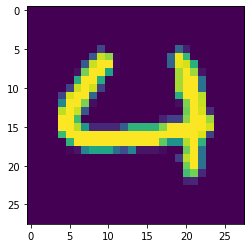

In [12]:
matplotlib.pyplot.imshow(train_data[check]) 
print('label:', train_label[check])

In [13]:
#Normalization

train_data=train_data/255
test_data=test_data/255

# MLP (One layer) 

In [222]:
class MLP():
    def __init__(self, batch, lr):
        self.batch=batch
        self.w1=np.random.rand(28*28, 10)
        self.b1=np.random.rand(10)
        self.lr=lr
        
    def relu(self, x):
        return np.maximum(0, x)
    
    def sigmoid(self, x, der=False):
        if der==False:
            return 1/(1+np.exp(-1*x))
        else:
            return (1/(1+np.exp(-1*x)))*(1- (1/(1+np.exp(-1*x))))
    
    def softmax(self, x, der=False):
        ex=np.exp(x)
        return ex/np.sum(ex) 
    
    def forward(self, x):
        self.x=x.reshape(-1)
        self.net=np.dot(self.x, self.w1) + self.b1
        prob=self.softmax(self.net)
        return prob
    
    def backward(self, pred, label, g1, b1):
        err1=pred-label
        g1+=np.matmul(np.transpose(self.x).reshape(-1,1), err1.reshape(1, -1))
        b1+=err1
        return g1, b1
        
    def update(self, g1,b1):
        self.w1-=self.lr*g1/self.batch
        self.b1-=self.lr*b1.reshape(-1)/self.batch


In [223]:
def crossEntropy(y, label):
    delta=int(1e-7)
    return -1*np.sum(label*np.log(y+delta))

# Train

In [224]:
batch=128
lr=0.001
layer=MLP(batch, lr)

In [225]:
val_data=train_data[len(train_data)//batch*batch:]
val_label=train_label[len(train_data)//batch*batch:]

In [226]:
#for i in range(0, len(train_data), batch):
for e in range(100):
    print('###########################################') 
    print('epoch:',e)
    for i in range(len(train_data)//batch):
    #for i in range(1):
        #g1, b1, g2, b2=0,0,0,0
        g1, b1=0,0
        loss=0 
        for j in range(i*batch, (i+1)*batch):
            pred=layer.forward(train_data[j])
            loss+=crossEntropy(pred, train_label[j])
            g1, b1=layer.backward(pred, train_label[j], g1, b1)
        layer.update(g1,b1)
        if i%100==0:
            print('iter:',i, 'loss:', loss/batch)
    result=[]
    for i in range(len(val_data)):
        result.append(np.argmax(layer.forward(val_data[i])))
    count=0
    for l, r in zip(val_label, result):
        if np.argmax(l)==r:
            count+=1
    print('Acc:', count/len(val_label))

###########################################
epoch: 0
iter: 0 loss: 4.399618861583656
iter: 100 loss: 4.133578031741354
iter: 200 loss: 3.361099880695041
iter: 300 loss: 3.5012170163381118
iter: 400 loss: 2.467284236687878
Acc: 0.14583333333333334
###########################################
epoch: 1
iter: 0 loss: 2.816144971388114
iter: 100 loss: 3.163026274043697
iter: 200 loss: 2.6645751314542965
iter: 300 loss: 2.8965647157465364
iter: 400 loss: 2.108565745360322
Acc: 0.1875
###########################################
epoch: 2
iter: 0 loss: 2.3399966351906905
iter: 100 loss: 2.714589057886846
iter: 200 loss: 2.2838988169214773
iter: 300 loss: 2.5081453185261022
iter: 400 loss: 1.8555418583375063
Acc: 0.2604166666666667
###########################################
epoch: 3
iter: 0 loss: 2.0134802677415506
iter: 100 loss: 2.3805127267695467
iter: 200 loss: 1.9993573851166384
iter: 300 loss: 2.2071843919789953
iter: 400 loss: 1.659838994381156
Acc: 0.34375
###############################

iter: 100 loss: 0.6525109210690715
iter: 200 loss: 0.558097293633748
iter: 300 loss: 0.6661547054022547
iter: 400 loss: 0.6673351104973216
Acc: 0.8020833333333334
###########################################
epoch: 34
iter: 0 loss: 0.5703857665258625
iter: 100 loss: 0.6426415290002734
iter: 200 loss: 0.5497340670555891
iter: 300 loss: 0.6567738674828829
iter: 400 loss: 0.660923947180292
Acc: 0.8125
###########################################
epoch: 35
iter: 0 loss: 0.5632333777783767
iter: 100 loss: 0.6332830319248628
iter: 200 loss: 0.5418140392926648
iter: 300 loss: 0.6478638235357834
iter: 400 loss: 0.6548143911243027
Acc: 0.8229166666666666
###########################################
epoch: 36
iter: 0 loss: 0.5564492543541517
iter: 100 loss: 0.6243952137657164
iter: 200 loss: 0.5343028479481169
iter: 300 loss: 0.6393886820319234
iter: 400 loss: 0.6489831697157484
Acc: 0.8229166666666666
###########################################
epoch: 37
iter: 0 loss: 0.5500044508101938
iter: 100 

iter: 100 loss: 0.47419030334757895
iter: 200 loss: 0.41012518440328133
iter: 300 loss: 0.4944399005093032
iter: 400 loss: 0.5442238833716408
Acc: 0.8333333333333334
###########################################
epoch: 67
iter: 0 loss: 0.43998304091214135
iter: 100 loss: 0.4712845011366501
iter: 200 loss: 0.40779714805958583
iter: 300 loss: 0.4916143915060308
iter: 400 loss: 0.5420402348245392
Acc: 0.8333333333333334
###########################################
epoch: 68
iter: 0 loss: 0.43780188244161755
iter: 100 loss: 0.4684534228792316
iter: 200 loss: 0.405532569743606
iter: 300 loss: 0.488861664269201
iter: 400 loss: 0.5399055560825156
Acc: 0.8333333333333334
###########################################
epoch: 69
iter: 0 loss: 0.43567303444189626
iter: 100 loss: 0.46569399956337754
iter: 200 loss: 0.40332877771039893
iter: 300 loss: 0.4861788248309922
iter: 400 loss: 0.5378180323332816
Acc: 0.8333333333333334
###########################################
epoch: 70
iter: 0 loss: 0.4335943

iter: 400 loss: 0.492130880459946
Acc: 0.8333333333333334
###########################################
epoch: 99
iter: 0 loss: 0.38856341474771766
iter: 100 loss: 0.40594313892552775
iter: 200 loss: 0.35659176569829243
iter: 300 loss: 0.42841067455059234
iter: 400 loss: 0.49093062775094154
Acc: 0.8333333333333334


# Test

In [227]:
result=[]
for i in range(len(test_data)):
    result.append(np.argmax(layer.forward(test_data[i])))
count=0
for l, r in zip(test_label, result):
    if np.argmax(l)==r:
        count+=1
print('Test Accuracy:', count/len(test_label))

Test Accuracy: 0.8673
